# Logistics

* If you feel lost while working on this notebook (in class or outside or class), don't hesitate to post questions here: https://piazza.com/class/jrzeap5kpirw

# Description of the dataset

The file "Bertrand-physiodata.csv" was captured using the Empatica E4 wristband when Bertrand was teaching a class last Fall. The E4 collects information about a person's heart rate, electrodermal actibity, movements and temperature:

![title](https://support.empatica.com/hc/article_attachments/360000797783/e4_specs.jpg)

the csv file contains the following columns:
* **tags**: users can tag events by pressing a button on the wristband
* **real time**: time of the data collection
* **unix time**: number of seconds since 00:00:00 Thursday, 1 January 1970
* **BVP**: Blood volume pressure (used to compute HR data)
* **HR**: Heart rate data
* **EDA**: Electrodermal activity (i.e., physiological arousal)
* **TEMP**: temperature of the skin
* **ACC_x**: accelerometer data on the x axis
* **ACC_y**: accelerometer data on the y axis
* **ACC_z**: accelerometer data on the z axis

Today we are going to explore Bertrand's physiological response to teaching! :) more specifically, we are going to explore the relationship between heart rate and electrodermal activity. 

# Panda Review

Concepts: 
* head, tail, info, values
* zip, dict, pd.DataFrame
* df.columns
* read_csv, delimiter, header, index



In [1]:
# 1) import the pandas library as pd
import pandas as pd

In [2]:
# 2) import the csv file into a variable called df
df = pd.read_csv('./Bertrand-physiodata.csv')

In [3]:
# 3) print the column names, just to make 
# sure that it matches what we have above
df.columns

Index(['tags', 'real time', 'unix time', 'BVP', 'HR', 'EDA', 'TEMP', 'ACC_x',
       'ACC_y', 'ACC_z'],
      dtype='object')

In [4]:
# 4) use the head() function to check your data
df.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
0,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,0.0,33.31,-50.0,7.0,28.0
1,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-41.0,6.0,28.0
3,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-40.0,7.0,25.0


In [5]:
# 5) use the tail() function on your dataframe. How many rows do you have?
df.tail()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
333871,2.0,9/11/18 09:55,1.536674e+09,-2.74,NaN,NaN,NaN,NaN,NaN,NaN
333872,2.0,9/11/18 09:55,1.536674e+09,-2.11,NaN,NaN,NaN,-43.0,15.0,44.0
333873,2.0,9/11/18 09:55,1.536674e+09,-1.64,NaN,NaN,NaN,NaN,NaN,NaN
333874,2.0,9/11/18 09:55,1.536674e+09,-1.48,NaN,NaN,NaN,-42.0,15.0,44.0
333875,NaN,NaN,NaN,-1.66,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 6) use the info() function to inspect your data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333876 entries, 0 to 333875
Data columns (total 10 columns):
tags         333875 non-null float64
real time    333575 non-null object
unix time    333875 non-null float64
BVP          333575 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        166788 non-null float64
ACC_y        166788 non-null float64
ACC_z        166788 non-null float64
dtypes: float64(9), object(1)
memory usage: 25.5+ MB


In [7]:
# 7) knowing that BVP is collected 64 times per second (i.e., 64Hz),
# what can you tell of the sampling frequency of the other measures?

column_list = df.columns.tolist()
BVP_freq= 64
for x in range(4,10):
    freq = round(df.iloc[:,x].count()/df['BVP'].count()*BVP_freq,0)
    print('Sampling frequency of', column_list[x], 'is', freq,'Hz')


Sampling frequency of HR is 1.0 Hz
Sampling frequency of EDA is 4.0 Hz
Sampling frequency of TEMP is 4.0 Hz
Sampling frequency of ACC_x is 32.0 Hz
Sampling frequency of ACC_y is 32.0 Hz
Sampling frequency of ACC_z is 32.0 Hz


# Plotting

Concepts: 
* plot, subplot, line plots, scatter, box plots, hist, ...
* mean, median, quantiles, STD, etc. 
* separate and summarize

In [8]:
# 8) make sure you're plotting your graphs inline
# Hint: https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline
import matplotlib.pyplot as plt
%matplotlib inline

### Let's work on the heart rate (HR) data first

In this section we are going to produce various graphs to inspect Bertrand's heart rate data. 

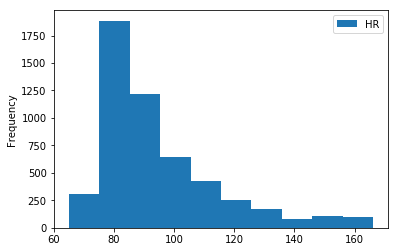

In [9]:
# 9) produce a histogram of the heart rate data; what can you say from it?
df.plot(y='HR',kind='hist')

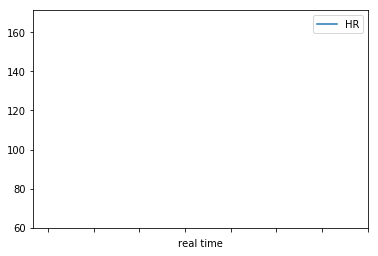

In [10]:
# 10) Try to plot the values over time (e.g., use the real time for the x axis):

df.plot(x='real time', y='HR')
plt.show()

11) What happened? Come up with 2-3 reasons why this didn't work before you move on to the next question:
- reason 1: The HR coloumn contains nan values.
- reason 2: The real time column contains strings rather than floats.

After you've anwered the question above, feel free to look at this hint and try to fix your dataframe: https://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings/22553757

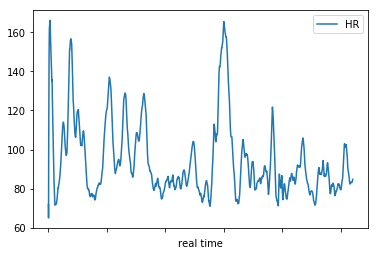

In [11]:
# 12) Fix your dataframe using the link above: 
df_clean = df.dropna()
df_clean.plot(x='real time', y='HR')
plt.show()

### Now let's look at the electrodermal activity data (EDA)

In this section we are going to produce various graphs to inspect Bertrand's electrodermal data. 

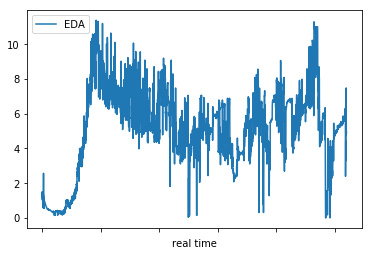

In [12]:
# 13) produce a line plot to visually inspect the EDA data
# Hint: make sure you filter the nonnull data
df_clean.plot(x='real time', y='EDA',kind='line')
plt.show()

Feel free to look at the following page to make sense of the units of the EDA data: 
* https://support.empatica.com/hc/en-us/articles/203621955-What-should-I-know-to-use-EDA-data-in-my-experiment-

In [13]:
# 14) we don't have any labels on the x axis! 
# convert the 'real time' column into a real date time
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=3
#format='%d/%m/%Y %H:%M'
df_clean['real date time'] = pd.to_datetime(df_clean['real time'],format='%d/%m/%y %H:%M')
df_clean.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z,real date time
640,0.0,9/11/18 08:28,1.536669e+09,-79.05,72.00,1.059777,33.31,-13.0,65.0,-24.0,2018-11-09 08:28:00
704,0.0,9/11/18 08:28,1.536669e+09,218.11,71.50,1.125105,33.31,-35.0,-7.0,34.0,2018-11-09 08:28:00
768,0.0,9/11/18 08:28,1.536669e+09,-20.02,65.00,1.501703,33.31,-40.0,-12.0,34.0,2018-11-09 08:28:00
832,0.0,9/11/18 08:28,1.536669e+09,76.70,92.25,1.204524,33.31,-31.0,13.0,46.0,2018-11-09 08:28:00
896,0.0,9/11/18 08:28,1.536669e+09,71.85,87.60,1.184028,33.31,-38.0,8.0,51.0,2018-11-09 08:28:00


In [14]:
# 15) print the mean and median values of the EDA data; explain how they are different
print(df_clean['EDA'].mean())
print(df_clean['EDA'].median())

5.187734843906185
5.329635


The mean gives the average of the EDA data while the median gives the middle EDA value.

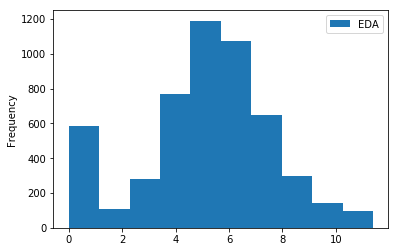

In [15]:
# 16) plot a histogram of the EDA values; does that confirm your interpretation above?
df_clean.plot(y='EDA', kind='hist')
plt.show()

From the histogram, it can be seen the distribution of EDA is approximately symmetric, and hence the mean and median values of EDA are approximately the same.

### Combining EDA and HR data on the same graph

In this section we are going to produce various graphs to inspect both the HR and EDA data.

In [16]:
# 17) filter both the EDA and HR values to keep the non-null rows:
df_filter = df.dropna(subset=['EDA','HR'])
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5203 entries, 640 to 333868
Data columns (total 10 columns):
tags         5203 non-null float64
real time    5203 non-null object
unix time    5203 non-null float64
BVP          5203 non-null float64
HR           5203 non-null float64
EDA          5203 non-null float64
TEMP         5202 non-null float64
ACC_x        5203 non-null float64
ACC_y        5203 non-null float64
ACC_z        5203 non-null float64
dtypes: float64(9), object(1)
memory usage: 447.1+ KB


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


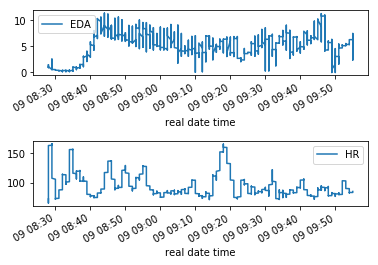

In [17]:
# 18) plot EDA and HR on two different graphs using subplots
# hint: https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib

fig, ax = plt.subplots(nrows=2, ncols=1)
df_filter['real date time'] = pd.to_datetime(df_clean['real time'],format='%d/%m/%y %H:%M')
df_filter.plot(ax=ax[0],x='real date time', y='EDA')
df_filter.plot(ax=ax[1],x='real date time', y='HR')
plt.subplots_adjust(hspace=1)
plt.show()

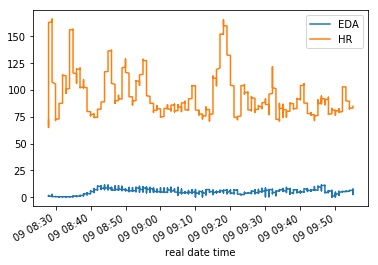

In [18]:
# 19) plot EDA and HR on the same graph; what went wrong?
df_filter.plot(x='real date time', y=['EDA','HR'])
plt.show()

The values for EDA are much smaller than that of EDA. Hence, the two lines are way separated, which does not allow for easy comparison.

In [19]:
# 20) normalize the HR and EDA columns using your favorite normalization strategy
# Hint: https://stackoverflow.com/questions/12525722/normalize-data-in-pandas

df_filter['HR_norm'] = (df_filter['HR']-df_filter['HR'].mean())/df_filter['HR'].std()
df_filter['EDA_norm'] = (df_filter['EDA']-df_filter['EDA'].mean())/df_filter['EDA'].std()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


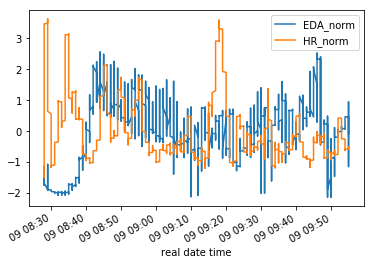

In [20]:
# 21) plot EDA and HR on the same graph; does the result look better?
df_filter.plot(x='real date time', y=['EDA_norm','HR_norm'])
plt.show()

In [21]:
# 22) what can you observe from the graph? Does there seem to be an agreement between HR and EDA?
print('There seems to be an inverse relationship between HR and EDA. When HR increases, EDA decreases, and vice versa.')

There seems to be an inverse relationship between HR and EDA. When HR increases, EDA decreases, and vice versa.


**IN-CLASS DISCUSSION**: why do we normalize values? When do we want to normalize them?

# Time series

Concepts:
* indexing, slicing, datetimeIndex
* resampling, rolling mean
* method chaining and filtering
* plotting time series

In this section, we are going to work with some built-in function of pandas to work with time series. More specifically, we are going to downsample our data and use a rolling window to generate additional graphs.

In [22]:
# let's reimport our data to make sure it's clean
df = pd.read_csv('Bertrand-physiodata.csv')
filtered_df = df[df['EDA'].notnull() & df['EDA'].notnull()].copy()

# make sure that you are converting the real time column into a datetime
filtered_df['real time'] = pd.to_datetime(filtered_df['real time'], format='%d/%m/%y %H:%M')
filtered_df = filtered_df.set_index('real time')

filtered_df.head()

,tags,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
real time,,,,,,,,,
2018-11-09 08:28:00,0.0,1.536669e+09,0.00,NaN,0.000000,33.31,-50.0,7.0,28.0
2018-11-09 08:28:00,0.0,1.536669e+09,-0.05,NaN,0.836457,33.31,-32.0,64.0,27.0
2018-11-09 08:28:00,0.0,1.536669e+09,6.20,NaN,1.183860,33.31,-14.0,57.0,50.0
2018-11-09 08:28:00,0.0,1.536669e+09,22.90,NaN,1.167277,33.31,-22.0,52.0,24.0
2018-11-09 08:28:00,0.0,1.536669e+09,93.76,NaN,1.278719,33.31,-17.0,53.0,27.0


### Down sampling

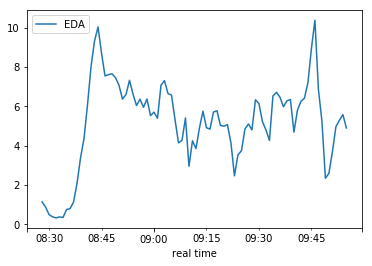

In [23]:
# 23) Use the instruction from datacamp to resample your data in 60 seconds windows and plot the result
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=7
filtered_df_resample = filtered_df.resample('60s').mean()
filtered_df_resample.plot(y=['EDA'])
plt.show()

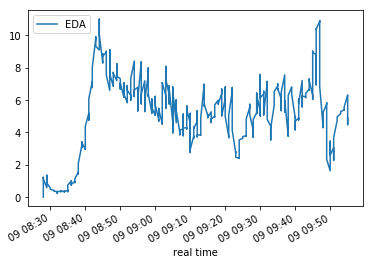

In [24]:
# 24) do the same thing, but this time using the rolling() function in a 60sec window
filtered_df_rolling = filtered_df.rolling('60s').mean()
filtered_df_rolling.plot(y=['EDA'])
plt.show()

In [25]:
# 25) What is the difference between rolling() and resample()? Why do the graphs look different?
print('rolling() calculates the mean continuously based on the past few observations while resample() calculates the mean based on chunks of observations. Therefore, rolling() produces a graph that seems less smooth.')

rolling() calculates the mean continuously based on the past few observations while resample() calculates the mean based on chunks of observations. Therefore, rolling() produces a graph that seems less smooth.


## Correlations

In this section we're going to keep exploring the relationship between heart rate data and electrodermal activity. We are going to do this visually (with a scatter plot first) and then using a statistical test (Pearson's correlation). 

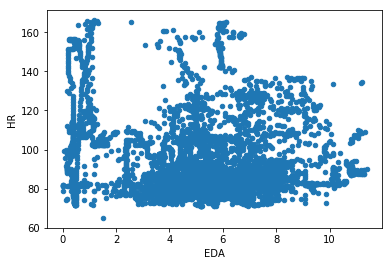

In [26]:
# 26) create a scatter plot between HR and EDA:
filtered_df.plot(y='HR',x='EDA',kind='scatter')
plt.show()

In [27]:
# 27) compute pearson's correlation between the HR and EDA data
filtered_df[['HR','EDA']].corr(method='pearson')

,HR,EDA
HR,1.000000,-0.138619
EDA,-0.138619,1.000000


In [28]:
# 29) what can you conclude? Is there a linear relationship between HR and EDA data in this dataset?
print('The pearson correlation is negative in values, which suggests an inverse relationship between HR and EDA. However, the value of the Pearson correlation is small and thus the linear relationship between HR and EDA is not strong.')

The pearson correlation is negative in values, which suggests an inverse relationship between HR and EDA. However, the value of the Pearson correlation is small and thus the linear relationship between HR and EDA is not strong.
